442 10


Text(0, 0.5, 'Prediction')

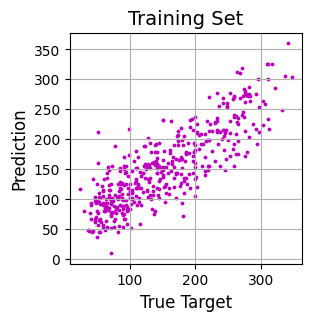

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
def gaussian(x, u, sigma):
    return(np.exp(-0.5 * np.linalg.norm(x-u) / sigma))
N, p = X.shape
print(N, p)
# Space for design matrix
#
M = 200
U = np.zeros((N,M))
# Basis function locations at random
#
C = np.random.randn(M,p)
# Basis function range as distance between two random data
#
x1 = X[np.floor(np.random.rand()*N).astype(int),:]
x2 = X[np.floor(np.random.rand()*N).astype(int),:]
sigma = np.linalg.norm(x1-x2)
# Construct the design matrix
#
for i in range(N):
    for j in range(M):
        U[i,j] = gaussian(X[i,:], C[j,:], sigma)
# Pseudo inverse solution for linear part
#
l = np.linalg.inv(U.T @ U) @ U.T @ y
# Predicted values on training data
#
yh = U @ l
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(y, yh, c="m", s=3)
ax.grid(True)
ax.set_title("Training Set", fontsize=14)
ax.set_xlabel("True Target", fontsize=12)
ax.set_ylabel("Prediction", fontsize=12)


In [4]:
from sklearn import preprocessing
from sklearn import KMeans
min_max_scaler = preprocessing.MinMaxScaler()
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

distance=[]
for i in range(10):
    X1,X2=X[np.random.choice(N,2,replace=False)]
    distance.append(np.linalg.norm(X1-X2))#欧氏距离
    
sigma =np.mean(distance)
# 使用 K-means 聚类选择基函数中心
def get_basis_centers(X, M):
    kmeans = KMeans(n_clusters=M, random_state=0)
    kmeans.fit(X)
    return kmeans.cluster_centers_

# 计算基函数中心
C = get_basis_centers(X, M)

SyntaxError: invalid syntax (2171826119.py, line 4)

C:\Users\26704\AppData\Local\Temp\ipykernel_21080\2203275948.py:99: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([linear_errors, rbf_errors], labels=['Linear Regression', 'RBF'])


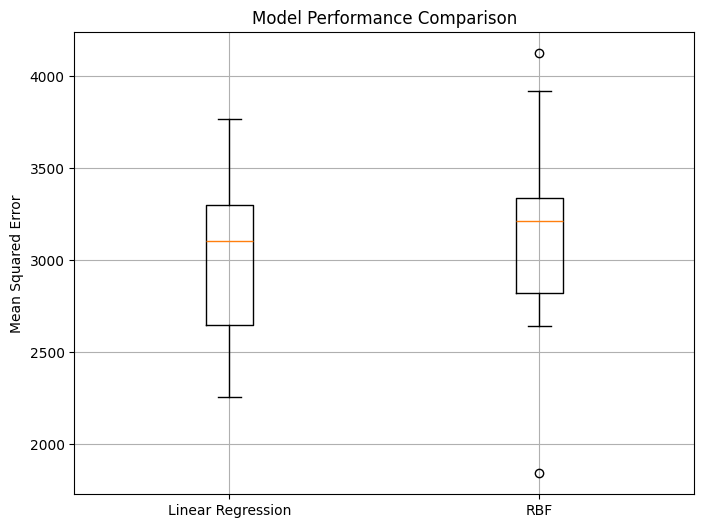

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# 1. 加载数据集并进行标准化
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Data standardization: mean 0, standard deviation 1
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


# 2. Define Gaussian radial basis functions and auxiliary functions
def gaussian(x, u, sigma):
    return np.exp(-0.5 * (np.linalg.norm(x - u) / sigma) ** 2)


def compute_sigma(X, num_pairs=20):
    """Calculate sigma by averaging the distance between multiple point pairs"""
    distances = []
    N = X.shape[0]
    for _ in range(num_pairs):
        idx1, idx2 = np.random.choice(N, 2, replace=False)
        distance = np.linalg.norm(X[idx1] - X[idx2])
        distances.append(distance)
    return np.mean(distances)


def get_basis_centers(X, M):
    """Use K-means clustering to select basis function centers"""
    kmeans = KMeans(n_clusters=M, random_state=0)
    kmeans.fit(X)
    return kmeans.cluster_centers_


# 3. 构建 RBF 模型
def build_rbf_model(X, y, M):
    """构建 RBF 设计矩阵并进行线性回归"""
    N, p = X.shape
    sigma = compute_sigma(X, num_pairs=20)
    C = get_basis_centers(X, M)

    # 构建设计矩阵 U
    U = np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            U[i, j] = gaussian(X[i], C[j], sigma)

    # 线性回归求解参数 l
    l = np.linalg.pinv(U.T @ U) @ U.T @ y
    return U, l, C, sigma


# 4.  Implement 10 fold cross validation
def evaluate_model_with_cv(X, y, model_type='RBF', M=50):
   """Perform 10 fold cross validation on RBF and linear regression models"""
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    errors = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        if model_type == 'RBF':
            # Construct RBF model
            U_train, l, C, sigma = build_rbf_model(X_train, y_train, M)
            U_test = np.zeros((X_test.shape[0], M))
            for i in range(X_test.shape[0]):
                for j in range(M):
                    U_test[i, j] = gaussian(X_test[i], C[j], sigma)
            y_pred = U_test @ l
        elif model_type == 'Linear':
            # use linear regression model
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # caculate MSE
        mse = mean_squared_error(y_test, y_pred)
        errors.append(mse)

    return errors


# 5. Evaluate the performance of RBF and linear regression models
M = 50  # Number of basis functions
rbf_errors = evaluate_model_with_cv(X, y, model_type='RBF', M=M)
linear_errors = evaluate_model_with_cv(X, y, model_type='Linear')


# 6. Draw a box plot to compare model performance
plt.figure(figsize=(8, 6))
plt.boxplot([linear_errors, rbf_errors], labels=['Linear Regression', 'RBF'])
plt.title("Model Performance Comparison")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


In [13]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


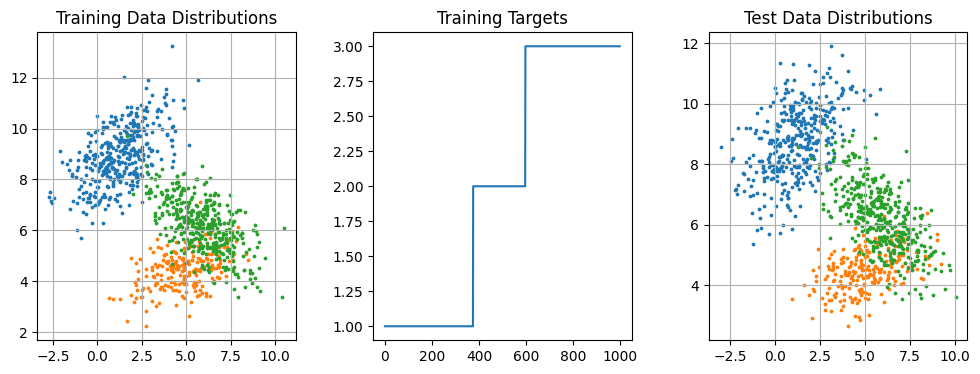

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_spd_matrix

# 生成高斯样本的函数
def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N, 2)
    return (U @ A.T + m)

# 设置类别数量
NClasses = 3

# 生成先验概率
w = np.random.rand(NClasses)
w = w / np.sum(w)

# 总数据数量 (训练集和测试集)
N = 1000
NPrior = np.floor(w * N).astype(int)

# 生成均值和协方差矩阵
Scale = 10
Means = Scale * np.random.rand(NClasses, 2)#均值向量决定了类别之间的中心距离
CovMatrices = np.zeros((NClasses, 2, 2))
for j in range(NClasses):
    CovMatrices[j, :, :] = make_spd_matrix(2)

# 生成训练数据
AllData_train = []
for j in range(NClasses):#协方差矩阵定义了每个类别的数据点的扩展方向和范围。
    AllData_train.append(genGaussianSamples(NPrior[j], Means[j, :], CovMatrices[j, :, :]))

# 合并训练数据
X_train = AllData_train[0]
y_train = np.ones((NPrior[0], 1))
for j in range(NClasses - 1):
    Xj = genGaussianSamples(NPrior[j + 1], Means[j + 1, :], CovMatrices[j + 1, :, :])
    X_train = np.append(X_train, Xj, axis=0)
    yj = (j + 2) * np.ones((NPrior[j + 1], 1))
    y_train = np.append(y_train, yj)

# 生成测试数据
AllData_test = []
for j in range(NClasses):
    AllData_test.append(genGaussianSamples(NPrior[j], Means[j, :], CovMatrices[j, :, :]))

# 合并测试数据
X_test = AllData_test[0]
y_test = np.ones((NPrior[0], 1))
for j in range(NClasses - 1):
    Xj = genGaussianSamples(NPrior[j + 1], Means[j + 1, :], CovMatrices[j + 1, :, :])
    X_test = np.append(X_test, Xj, axis=0)
    yj = (j + 2) * np.ones((NPrior[j + 1], 1))
    y_test = np.append(y_test, yj)

# 可视化
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

# 绘制训练数据分布
for j in range(NClasses):
    Xplt = AllData_train[j]
    ax[0].scatter(Xplt[:, 0], Xplt[:, 1], s=3)
ax[0].grid(True)
ax[0].set_title("Training Data Distributions")

# 绘制训练目标
ax[1].plot(y_train)
ax[1].set_title("Training Targets")

# 绘制测试数据分布
for j in range(NClasses):
    Xplt = AllData_test[j]
    ax[2].scatter(Xplt[:, 0], Xplt[:, 1], s=3)
ax[2].grid(True)
ax[2].set_title("Test Data Distributions")

plt.show()


In [21]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot_train = onehot_encoder.fit_transform(y_train.reshape(-1, 1))
# Training a neural network
#
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_onehot_train)
# Predictions, accuracy and confusion matrix
#
from sklearn.metrics import accuracy_score
y_pred_train = clf.predict(X_train)
print(accuracy_score(y_onehot_train, y_pred_train))
N_train = X_train.shape[0]
predicted_class_train = np.zeros((N_train,1))
for j in range(N_train):
    predicted_class_train[j] = (1+np.argmax(y_pred_train[j,:])).astype(int)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ")
print(confusion_matrix(y_train, predicted_class_train))

0.9288577154308617
Confusion Matrix: 
[[209   0   0]
 [  0 506  36]
 [  0  35 212]]


D:\编程软件\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import pandas as pd
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))#坐标序列
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    plt.title(title)
    plt.show()

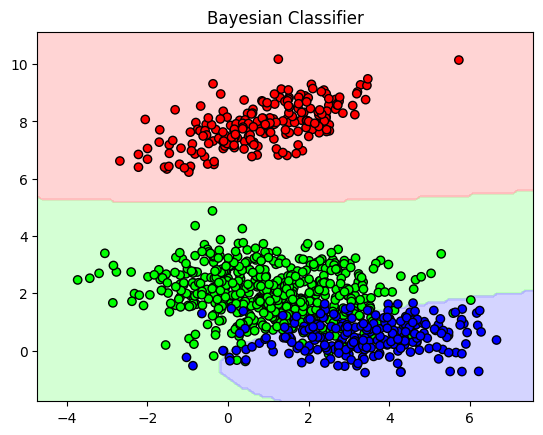

In [26]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, gnb, "Bayesian Classifier")

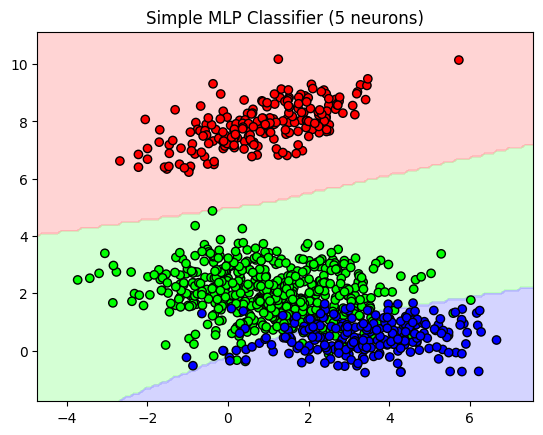

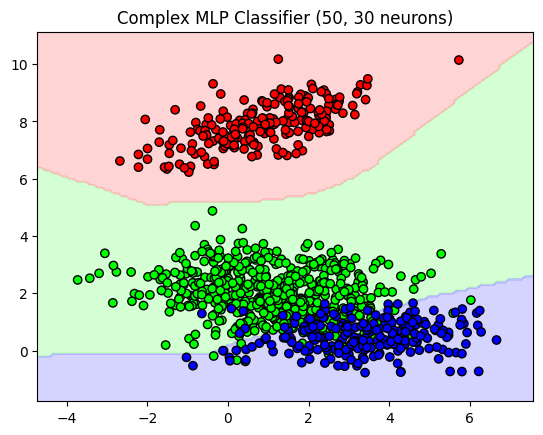

In [27]:
mlp_simple = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=42)
mlp_simple.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, mlp_simple, "Simple MLP Classifier (5 neurons)")

# 训练复杂的 MLP 分类器
mlp_complex = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
mlp_complex.fit(X_train, y_train)
plot_decision_boundary(X_train, y_train, mlp_complex, "Complex MLP Classifier (50, 30 neurons)")


In [28]:
learning_rates = [0.001, 0.01, 0.1]
hidden_layers = [(10,), (50,), (100,)]
results = []

for lr in learning_rates:
    for hl in hidden_layers:
        mlp = MLPClassifier(hidden_layer_sizes=hl, learning_rate_init=lr, max_iter=500, random_state=42)
        mlp.fit(X_train, y_train)
        accuracy = accuracy_score(y_train, mlp.predict(X_train))
        results.append((hl, lr, accuracy))
        print(f"Hidden layers: {hl}, Learning rate: {lr}, Accuracy: {accuracy:.4f}")

# 展示结果
df_results = pd.DataFrame(results, columns=['Hidden Layers', 'Learning Rate', 'Accuracy'])
print("\nMLP 参数调整结果：")
print(df_results)

Hidden layers: (10,), Learning rate: 0.001, Accuracy: 0.9309
Hidden layers: (50,), Learning rate: 0.001, Accuracy: 0.9299
Hidden layers: (100,), Learning rate: 0.001, Accuracy: 0.9329
Hidden layers: (10,), Learning rate: 0.01, Accuracy: 0.9299
Hidden layers: (50,), Learning rate: 0.01, Accuracy: 0.9329
Hidden layers: (100,), Learning rate: 0.01, Accuracy: 0.9309
Hidden layers: (10,), Learning rate: 0.1, Accuracy: 0.9319
Hidden layers: (50,), Learning rate: 0.1, Accuracy: 0.9248
Hidden layers: (100,), Learning rate: 0.1, Accuracy: 0.9339

MLP 参数调整结果：
  Hidden Layers  Learning Rate  Accuracy
0         (10,)          0.001  0.930862
1         (50,)          0.001  0.929860
2        (100,)          0.001  0.932866
3         (10,)          0.010  0.929860
4         (50,)          0.010  0.932866
5        (100,)          0.010  0.930862
6         (10,)          0.100  0.931864
7         (50,)          0.100  0.924850
8        (100,)          0.100  0.933868


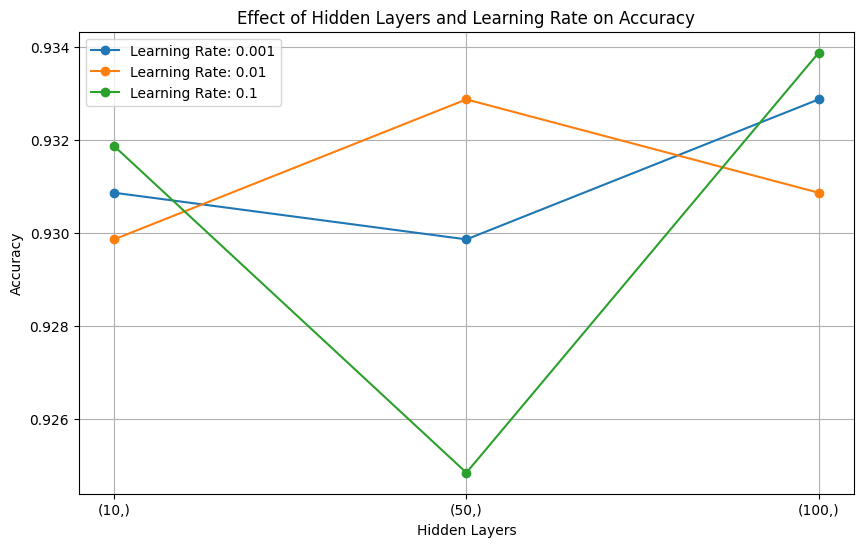

In [29]:
# 可视化参数调整的影响
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    subset = df_results[df_results['Learning Rate'] == lr]
    plt.plot([str(hl) for hl in subset['Hidden Layers']], subset['Accuracy'], marker='o', label=f'Learning Rate: {lr}')
plt.title("Effect of Hidden Layers and Learning Rate on Accuracy")
plt.xlabel("Hidden Layers")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

D:\编程软件\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\编程软件\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\编程软件\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\编程软件\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\编程软件\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations

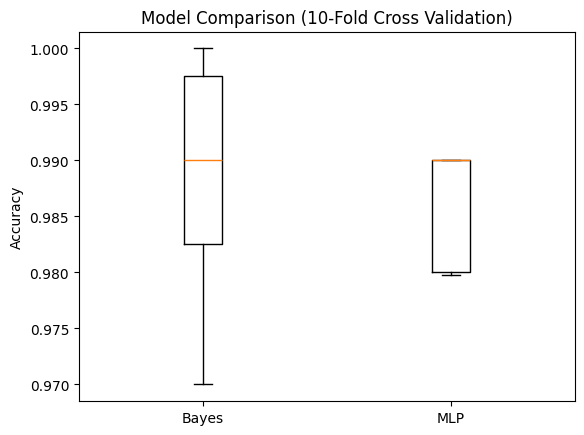

Bayes Average Accuracy: 0.99
MLP Average Accuracy: 0.99


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# 数据生成函数
def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N, 2)
    return (U @ A.T) + m

# 生成数据
np.random.seed(42)
NClasses = 3
w = np.random.rand(NClasses)
w = w / np.sum(w)  # 类别先验概率
N = 1000  # 总数据量
NPrior = np.floor(w * N).astype(int)

Scale = 10
Means = Scale * np.random.rand(NClasses, 2)  # 每个类别的均值
CovMatrices = [np.eye(2) for _ in range(NClasses)]  # 协方差矩阵

X, y = [], []
for j in range(NClasses):
    samples = genGaussianSamples(NPrior[j], Means[j, :], CovMatrices[j])
    X.append(samples)
    y.append(np.full((NPrior[j],), j))

X = np.vstack(X)
y = np.hstack(y)

# 十折交叉验证
kf = KFold(n_splits=10, shuffle=True, random_state=42)
bayes_scores, mlp_scores = [], []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 贝叶斯分类器
    bayes_model = GaussianNB()
    bayes_model.fit(X_train, y_train)
    bayes_scores.append(bayes_model.score(X_test, y_test))

    # MLP分类器
    mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
    mlp_model.fit(X_train, y_train)
    mlp_scores.append(mlp_model.score(X_test, y_test))

# 结果可视化
plt.boxplot([bayes_scores, mlp_scores], labels=["Bayes", "MLP"])
plt.title("Model Comparison (10-Fold Cross Validation)")
plt.ylabel("Accuracy")
plt.show()

# 输出结果
print(f"Bayes Average Accuracy: {np.mean(bayes_scores):.2f}")
print(f"MLP Average Accuracy: {np.mean(mlp_scores):.2f}")
